# 1. Summary

#### Aim:
To explore the Boston Housing data set using hierarchical clustering algorithm. Particularly, we are interested to see the segments that exist in Boston Housing data set.

#### Data:
- A sample of 506 observations and 14 features was provided in the data set.
- We have used only 11 features from the data: CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT.
- We de-scoped the target feature - MEDV, and other features - CAT. MEDV and CHAS from the analysis.
- We employed quantile transformation for feature scaling.

#### Methods:

- Sample size of 450 was used for fitting hierarchical cluster.
- Hierarchical clustering using ward, single, complete, and average methods were fitted to the data.
- Dendrogram visualisation technique was employed to visualise the cluster fits.

#### Results and findings:

- Both Ward and Average methods have fitted the data well. Ward method suggests three clusters in the data, and Average method suggests two clusters.
    - Single linkage and maximum linkage don't seem to fit the data well.

- Domain analysis: Should do further analysis and inspect the data/features to discover the latent factors of the clusters. Consult domain expert(s) for their opinions.
    - Clustering rationale could be based of:
        - Socio-economic factors: crime - low vs. high, neighbourhood - older vs. newer,
        - Urban vs. suburban vs. residential areas.

# 2. Technical notes

### a. Exploratory data analysis

In [227]:
!python --version

# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

# import random 
import random

import scipy
import statsmodels.api as sm

import sklearn
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram


import warnings
warnings.filterwarnings("ignore") # Suppress all warnings


Python 3.11.2


##### Read in the data 

In [228]:
data = pd.read_csv('\DATA\BostonHousing.csv', index_col=False)

##### Inspect the data

In [229]:
# shape
data.shape

(506, 14)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


##### Scale the numeric features

In [231]:
data = data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]

In [232]:
numeric_features = data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]

# Scale
scaler = QuantileTransformer(output_distribution='normal')
model = scaler.fit(numeric_features)

scaled_data = pd.DataFrame(model.transform(numeric_features))
scaled_data.columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

Comments: Quantile transformer scaling is sensible as the features are continuous numeric variables.

##### Select random sample from the data set 

In [233]:
sample_data = scaled_data.sample(450, random_state=2301)

##### Fit hierarchical clustering - single, complete, mean, and ward

In [234]:
# fit minimum or single linkage
hc_single = linkage(sample_data, method='single', metric='euclidean')


# fit maximum or complete linkage
hc_complete = linkage(sample_data, method='complete', metric='euclidean')


# fit mean linkage
hc_average = linkage(sample_data, method='average', metric='euclidean')


# fit ward linkage
hc_ward = linkage(sample_data, method='ward', metric='euclidean')


##### Visualise the clusters using dendrogram

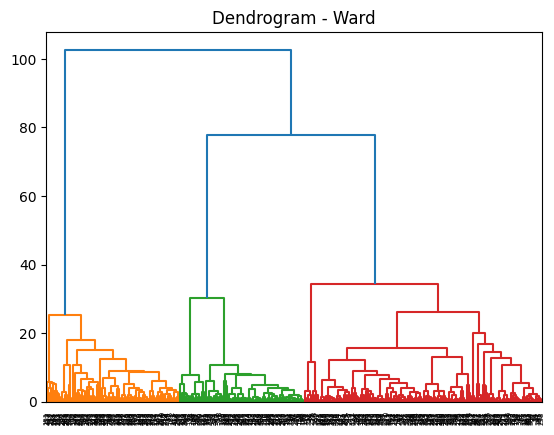

In [235]:
dendrogram(hc_ward)
plt.title('Dendrogram - Ward')
plt.show()

Comments:
- Ward method suggests three well fit clusters.

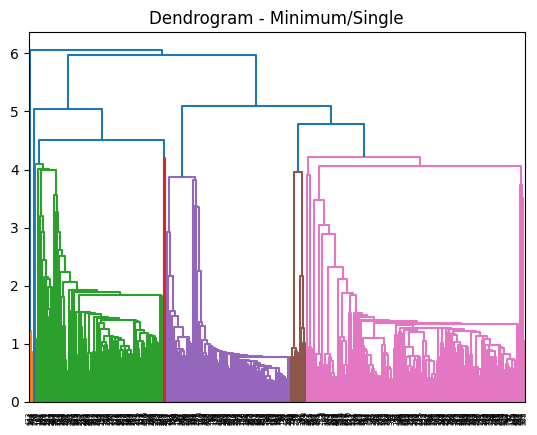

In [236]:
dendrogram(hc_single)
plt.title('Dendrogram - Minimum/Single')
plt.show()

Comments:
- This is a bit hard to interpret. From top-down view, there appears to be four well separated clusters, and from a bottom-up standpoint, we see ~six clusters.

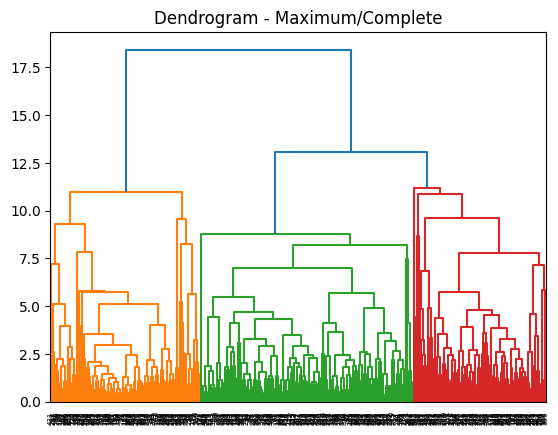

In [237]:
dendrogram(hc_complete)
plt.title('Dendrogram - Maximum/Complete')
plt.show()

Comments:
- Again we see three well fit clusters.

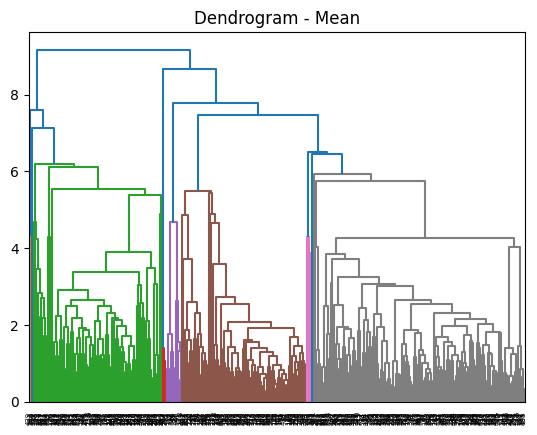

In [238]:
dendrogram(hc_average)
plt.title('Dendrogram - Mean')
plt.show()

Comments:
- From top-down we see two well fit clusters, and from bottom-up we see six/seven clusters. 

##### Visualise the clusters on feature space using scatter plot

In [239]:
#Cut the dendrogram to form clusters
num_clusters = 3

#Add cluster membership to the original data
hc_ward_labels = cut_tree(hc_ward, n_clusters=num_clusters).flatten()
hc_complete_labels = cut_tree(hc_complete, n_clusters=num_clusters).flatten()

num_clusters = 4
hc_single_labels = cut_tree(hc_single, n_clusters=num_clusters).flatten()

num_clusters = 2
hc_average_labels = cut_tree(hc_average, n_clusters=num_clusters).flatten()



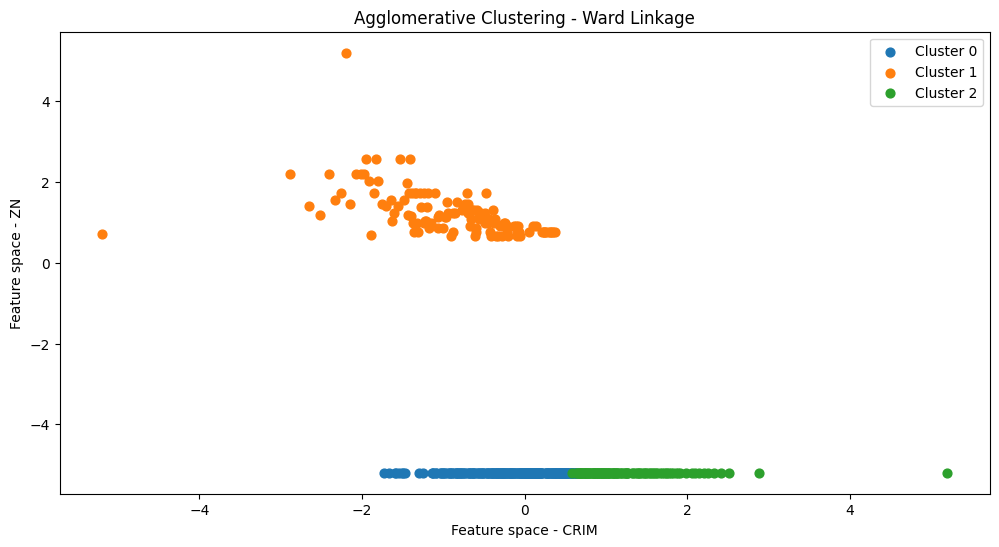

In [240]:
plt_data = np.array(sample_data.values)
#  Scatter plot for the visualising the clusters
plt.figure(figsize=(12, 6))
for cluster_label in np.unique(hc_ward_labels):
    cluster_indices = np.where(hc_ward_labels == cluster_label)
    plt.scatter(plt_data[cluster_indices, 0], plt_data[cluster_indices, 1], s=40, label=f'Cluster {cluster_label}')

plt.title('Agglomerative Clustering - Ward Linkage')
plt.xlabel('Feature space - CRIM')
plt.ylabel('Feature space - ZN')
plt.legend()

Comments:
- Cluster 1 appears to be separated well from the other two clusters. Clusters 0 and 2 have some overlaps, but there is a clear separation.

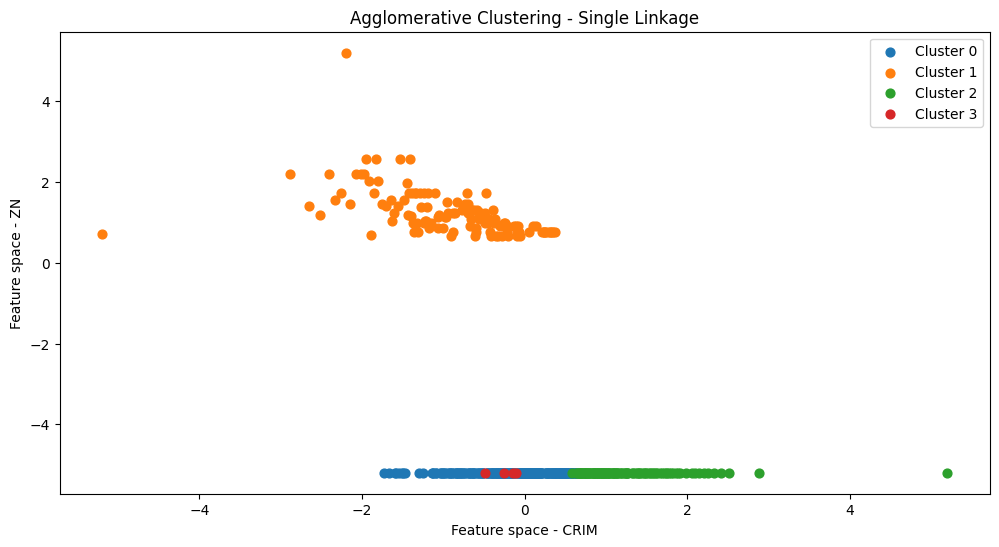

In [241]:
plt_data = np.array(sample_data.values)
#  Scatter plot for the visualising the clusters
plt.figure(figsize=(12, 6))
for cluster_label in np.unique(hc_single_labels):
    cluster_indices = np.where(hc_single_labels == cluster_label)
    plt.scatter(plt_data[cluster_indices, 0], plt_data[cluster_indices, 1], s=40, label=f'Cluster {cluster_label}')

#plt.yticks(np.arange(len(categories)), categories)
plt.title('Agglomerative Clustering - Single Linkage')
plt.xlabel('Feature space - CRIM')
plt.ylabel('Feature space - ZN')
plt.legend()

Comments:
- Cluster 1 appears to be separated well from the other two clusters. Other clusters appear to have some overlaps.

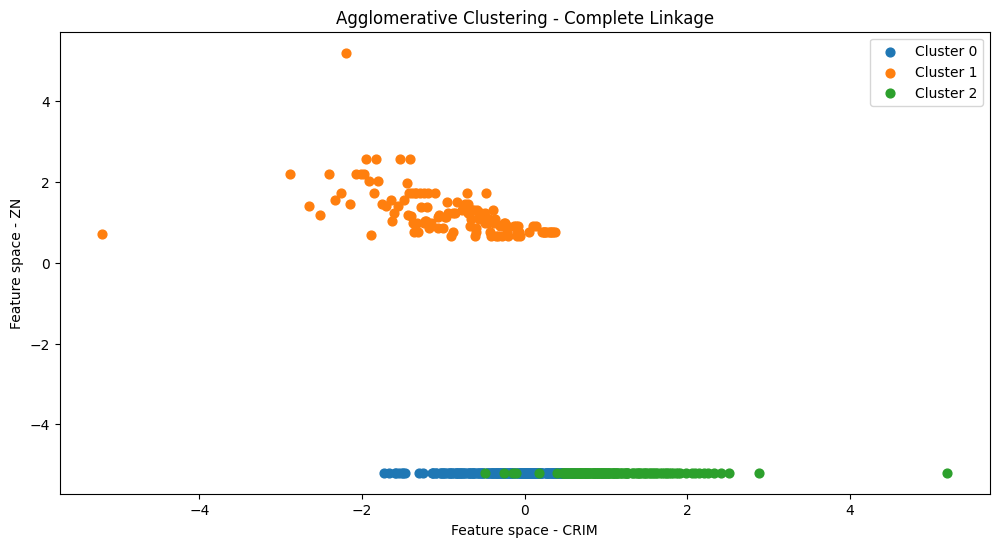

In [242]:
plt_data = np.array(sample_data.values)
#  Scatter plot for the visualising the clusters
plt.figure(figsize=(12, 6))
for cluster_label in np.unique(hc_complete_labels):
    cluster_indices = np.where(hc_complete_labels == cluster_label)
    plt.scatter(plt_data[cluster_indices, 0], plt_data[cluster_indices, 1], s=40, label=f'Cluster {cluster_label}')

plt.title('Agglomerative Clustering - Complete Linkage')
plt.xlabel('Feature space - CRIM')
plt.ylabel('Feature space - ZN')
plt.legend()

Comments:
- Cluster 1 appears to be separated well from the other two clusters.

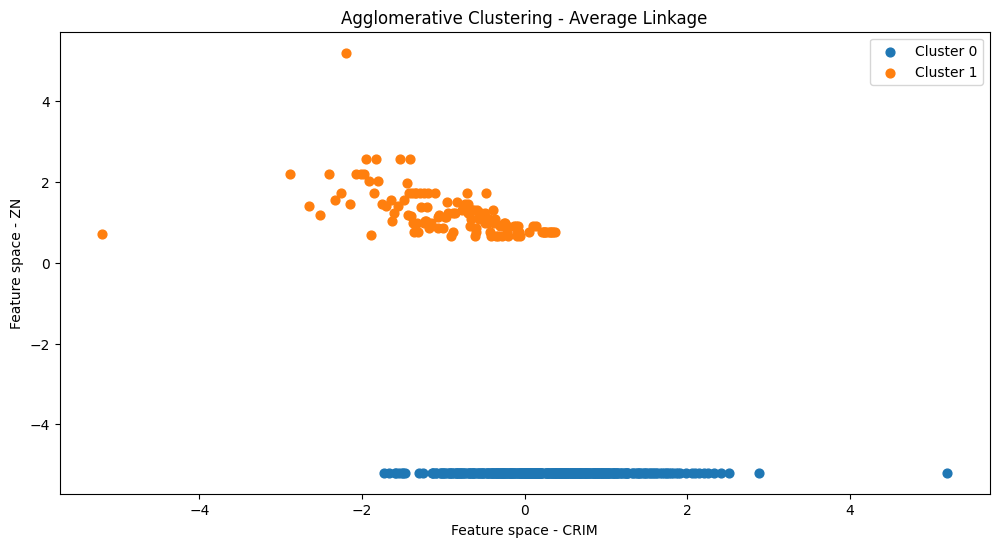

In [243]:
plt_data = np.array(sample_data.values)
#  Scatter plot for the visualising the clusters
plt.figure(figsize=(12, 6))
for cluster_label in np.unique(hc_average_labels):
    cluster_indices = np.where(hc_average_labels == cluster_label)
    plt.scatter(plt_data[cluster_indices, 0], plt_data[cluster_indices, 1], s=40, label=f'Cluster {cluster_label}')

plt.title('Agglomerative Clustering - Average Linkage')
plt.xlabel('Feature space - CRIM')
plt.ylabel('Feature space - ZN')
plt.legend()

Comments:
- Two clusters have fitted the data well.